# Análise e Visualização de Dados da Taxa de Homicidios Intencionais no Mundo.

### Análise do Número de Homicidios Intencional no Mundo, Analítico e Estudo Preciso.
### Foco em Países, Regiões e SubRegiões por Ano e seus Valores Correspondentes.

## Jonatha Rodrigues T. Vaz

# Inciando 

## Importando Bibliotecas ( Python ) para Análise

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Leitura do Arquivo e Breve Visualização 

In [3]:
df = pd.read_csv('homicidios_intencionais.csv')
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


## Executando comando de Número correspondente a Colunas e Linhas.

In [4]:
df.shape

(195, 6)

### Executando comando para obter Informações número de colunas, rótulos de coluna, tipos de dados de coluna, uso de memória, índice de intervalo e o número de células em cada coluna (valores não nulos)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


### Executando comando para Obter Ordenação do Dados e seus Valores Númericos, estatísticas descritivas, média, desvio padrão, máximo, mínimo, tendências centrais e forma da distribuição

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rate,195.0,6.845128,9.600060,0.0,1.1,2.6,7.85,49.3
Count,195.0,1942.800000,6553.343376,0.0,28.0,128.0,785.00,47722.0
Year,195.0,2017.420513,3.589445,2006.0,2016.0,2019.0,2020.00,2021.0


## Exibição do primeiro Gráfico com Matplotlib para o Top 10 Principais locais com a taxa mais alta

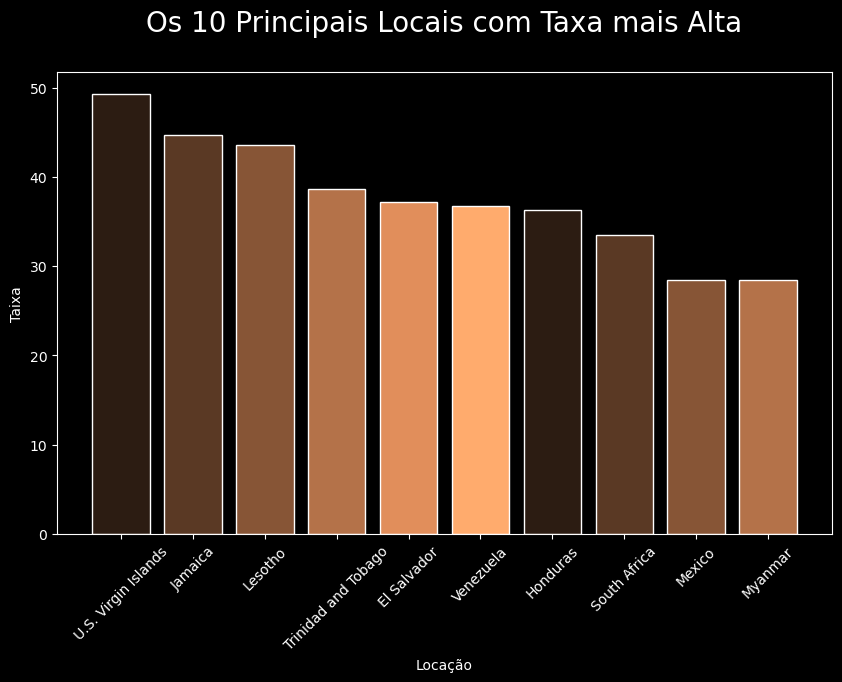

In [67]:
top_rate = df.sort_values(by = 'Rate', ascending = False).head(10)

plt.figure(figsize = (10, 6))
plt.style.use('dark_background')
colorpalette = sns.color_palette('copper')

plt.bar(top_rate['Location'], top_rate['Rate'], color=(colorpalette), edgecolor='white')
plt.xlabel('Locação')
plt.ylabel('Taixa')
plt.title('Os 10 Principais Locais com Taxa mais Alta\n', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

## Execução de Gráfico referente as Locações ( Países ) com maior Número de Homicidios Intencional

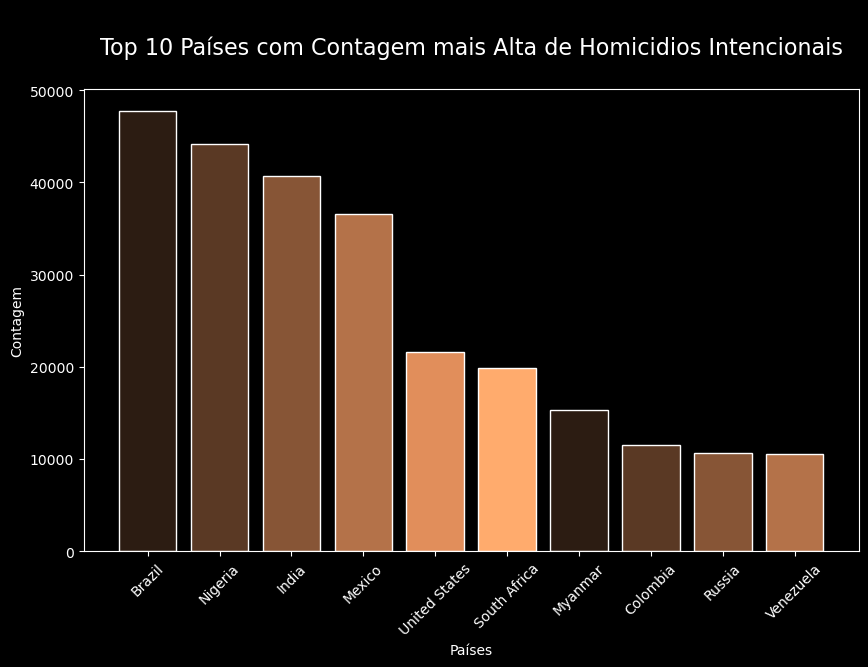

In [210]:
top_count = df.sort_values(by = 'Count', ascending = False).head(10)

plt.figure(figsize = (10, 6))
plt.style.use('dark_background')

plt.bar(top_count['Location'], top_count['Count'], color=(colorpalette), edgecolor='white')
plt.xlabel('Países')
plt.ylabel('Contagem')
plt.title('\nTop 10 Países com Contagem mais Alta de Homicidios Intencionais\n', fontsize = 16)
plt.xticks(rotation=  45)
plt.show()

##  Visualizando em Gráficos Informações Precisas dos Homicidios por Região, Ano e SubRegião

### Executando uma Função para Criação dos Gráficos em Diferentes Estilos e com Diferentes Refencias do Arquivo com Colunas e Linhas

In [203]:
def plots(df, x, y):
    plt.style.use('dark_background')
    f, ax = plt.subplots(1, 2, figsize = (20, 10))
    Group_data = df.groupby(x)
    sns.barplot(x = Group_data[y].mean().index, y = Group_data[y].mean().values, ax = ax[0], palette = 'winter', edgecolor='white')
    
    for container in ax[0].containers:
        ax[0].bar_label(container, color = 'white', size = 17)

    palette_color = sns.color_palette('copper')
    plt.pie(x = df[x].value_counts(),
            labels = df[x].value_counts().index,
            autopct = '%.0f%%',
            shadow = True,
            colors = palette_color)
    plt.suptitle(x, fontsize = 40)
    plt.show()

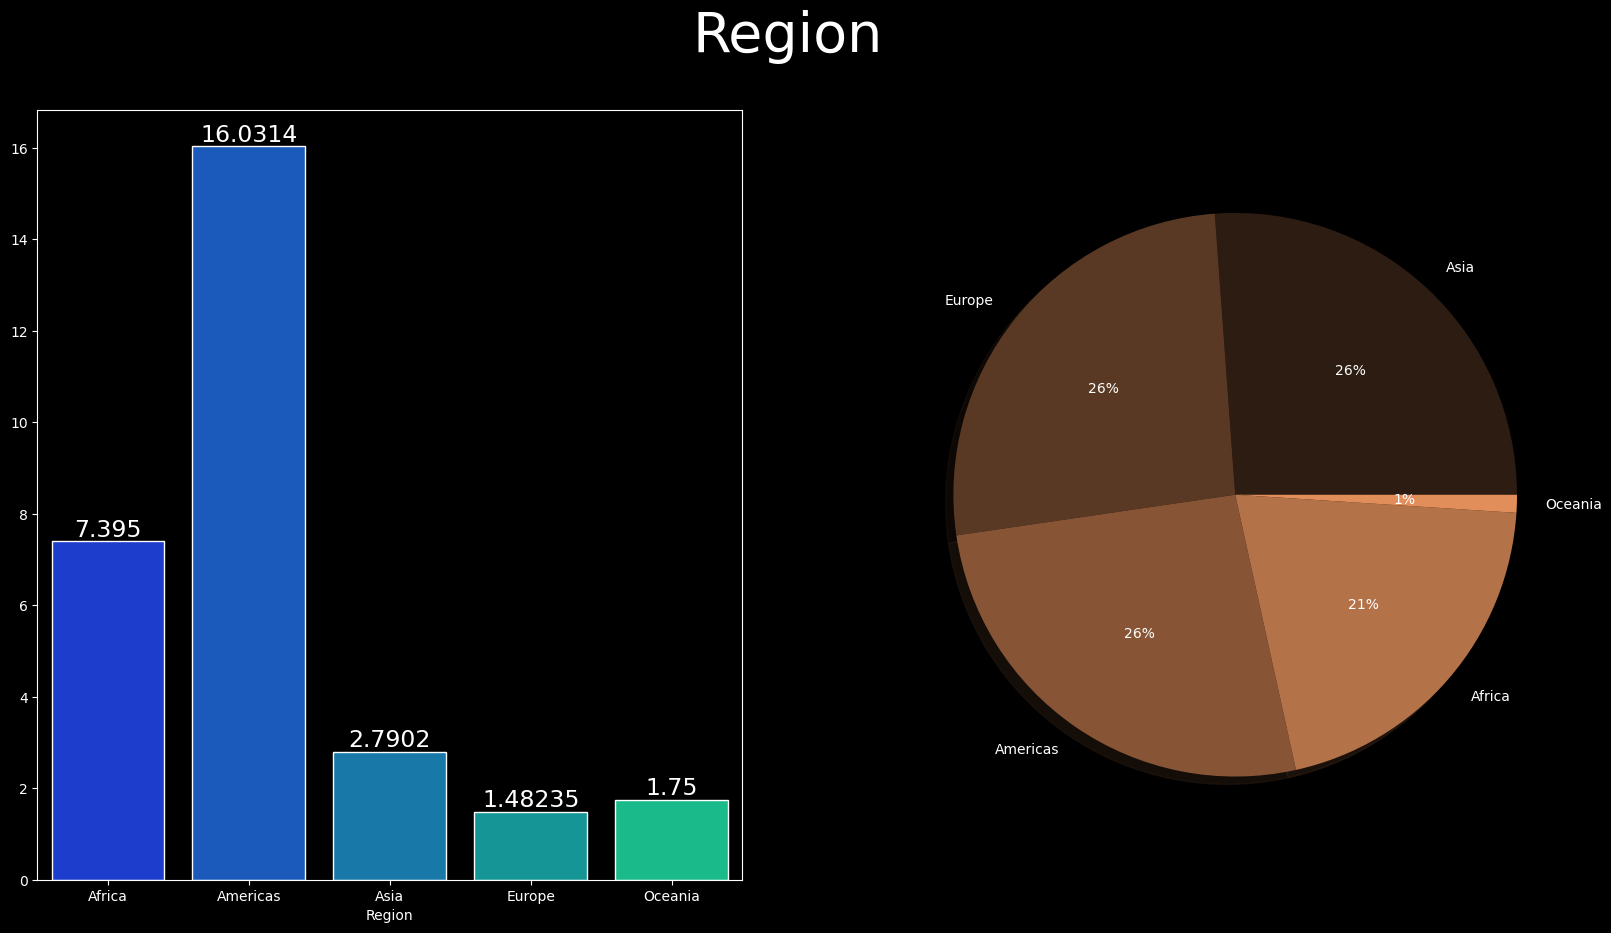

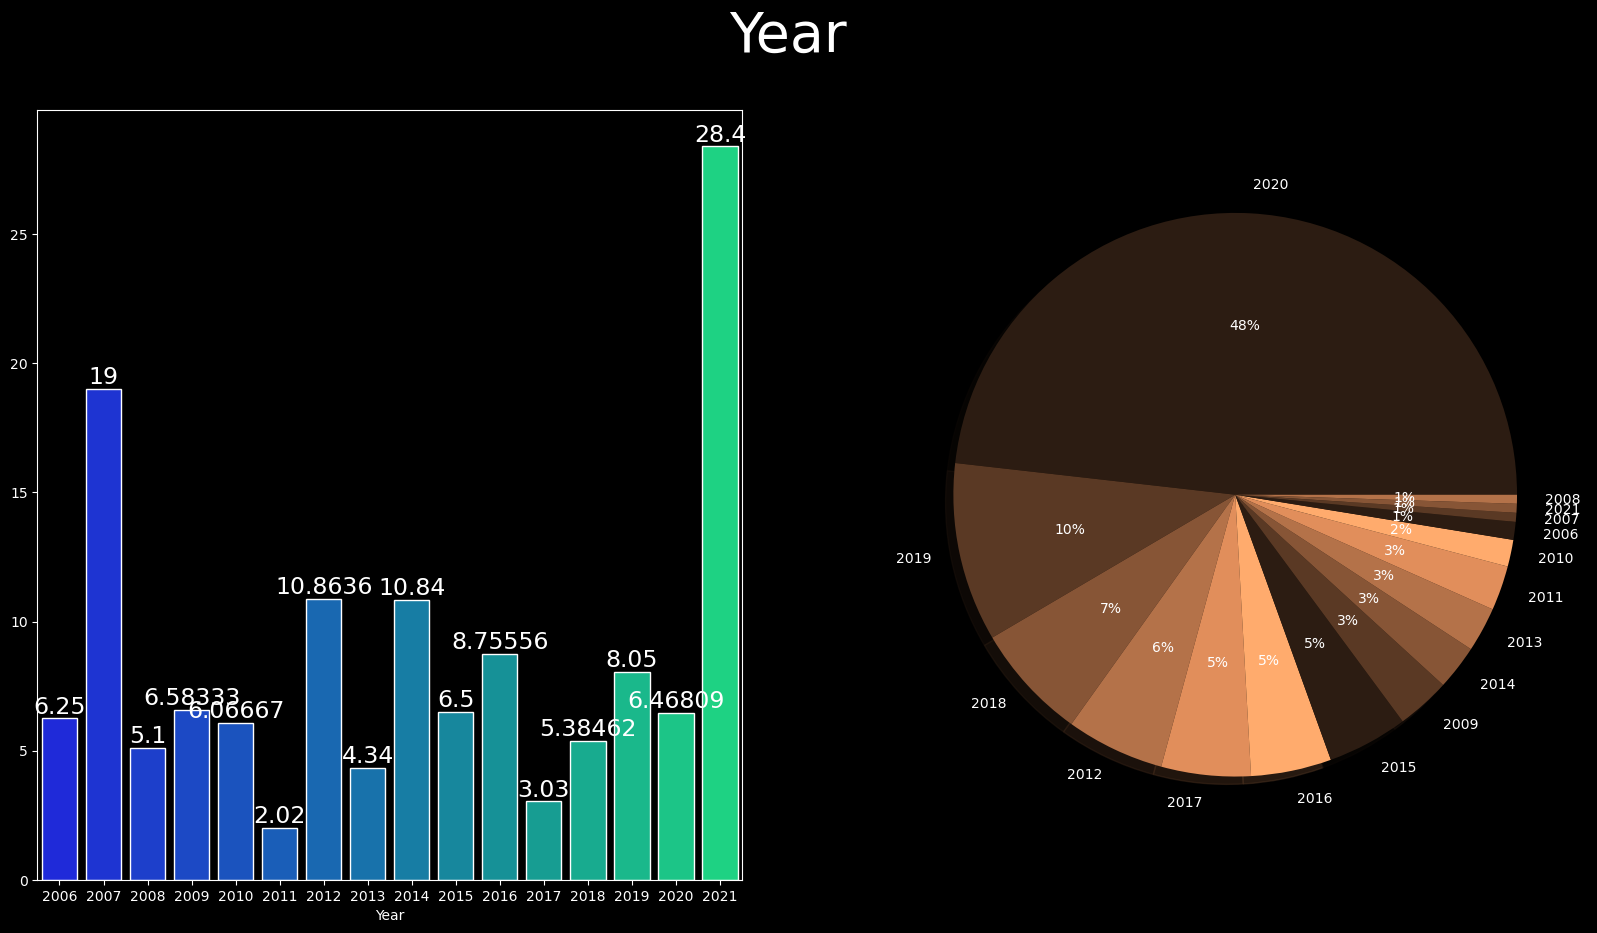

In [204]:
plots(df, 'Region', 'Rate')
plots(df, 'Year', 'Rate')

# Analisando os Top 15 Primeiros SubRegioes com maior Percentual de Homicídios

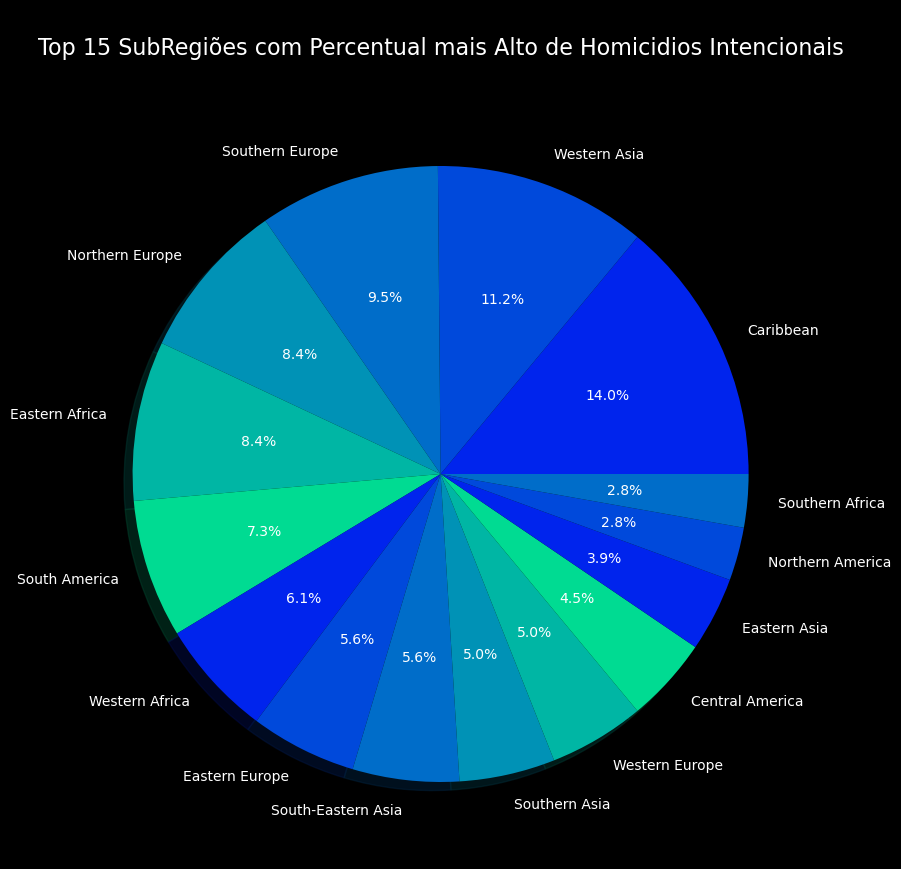

In [194]:
df_subregion = df['Subregion'].value_counts().nlargest(15)

palette___color = sns.color_palette('winter')
plt.figure(figsize = (15, 10))
plt.style.use('dark_background')

plt.pie(x = df_subregion, labels = df_subregion.index, colors=(palette___color), shadow=True, autopct='%1.1f%%')
plt.title('\nTop 15 SubRegiões com Percentual mais Alto de Homicidios Intencionais\n', fontsize = 16)


plt.show()

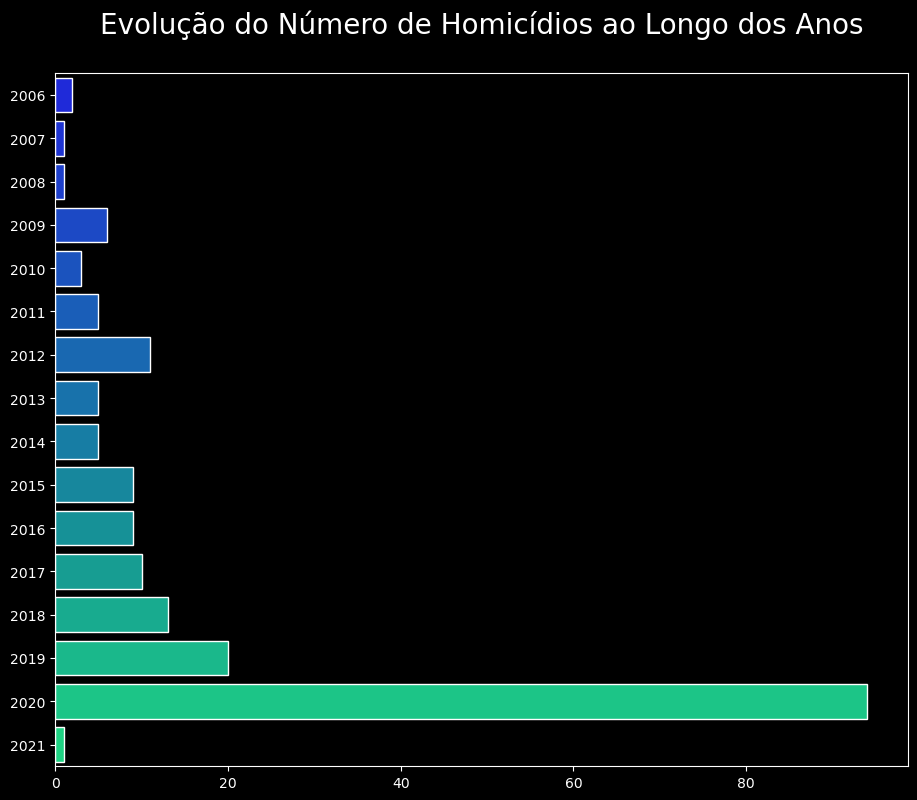

In [216]:
year_count = df['Year'].value_counts().nlargest(20)

plt.figure(figsize = (11, 9))
plt.title('Evolução do Número de Homicídios ao Longo dos Anos\n', fontsize = 20)
sns.barplot(x=year_count.values, y=year_count.index, orient='h', palette = 'winter', edgecolor='white')
plt.show()

# Análise Final Descritiva : 


### Ao vermos a Análise, chegamos a conclusão que houve um aumento Alarmante no decorrer dos ultimos 6 Anos.

### Observamos também que no ano de 2007 e 2008 a violência do homicidio intencional cresceu drásticamente em relação aos anos anteriores e poucos seguintes. A maior dominancia da Taxa de Homicidios Intencional corresponde a América, especificamente o Brasil e Estados Unidos estão em destaque na análise.

### As Regiões seguintes que também estão destaque são Asía, Europa e Africa, onde correspondem a mesma porcentagem da Taxa de Homicidio.




## Anos em Destaque : 2007/2008, 2018, 2019, 2020, 2021.
## Países em Destaque : Brasil, Estados Unidos, Sévia, China, Nigéria, Argentina, Alemanha, Inglaterra, Japão, Sudão do Sul.


## Anos menos Destacados : 2006, 2009, 2010, 2015.
## Países menos Destacados: Noruega, Suécia, Escócia, Canada, Australia.





# Considerações : 

### Nos Anos de 2020, 2021, 2022 pode-se notar uma elevação superior aos anos anteriores, isso corresponde porque nesses anos o mundo paralisou por conta do Covid-19, uma doença viral que mobilizou todas as nações a ficar em casa sob os cuidados aconselhados por estudos de cientistas da area congruente, tal acontecimento levou uma serie de fatores promissores aos atos de Homicidio como, Elevação do Nível de Estresse nas pessoas por sentirem um grande medo, que isso leva a questão de não se sentirem seguros e confortaveis com o vírus ( por motivos de vunerabilidade e possivelmente ocasionar a morte ),doenças psicologicas como, ansiedade, depressão, crises de pânico, esquizofrenia, que influênciam os atos e pensamentos referente ao estudo em questão, problemas interpessoais e pessoais, e conflitos entre Relacionamentos são um dos fatores que é similar a explicação dessa Análise.
